In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

In [2]:
def load_dataset():
    datasets_folder = "\\".join(os.getcwd().split('\\')[:-1]) + "\\datasets\\"
    df = pd.read_csv(datasets_folder+'cardio_train.csv',sep=';').set_index('id')
    return df
df = load_dataset()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [4]:
#-------------------------------------------------------------------

# Exploring the Dataset

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.sample(7)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
75157,15419,2,170,70.0,120,70,1,1,1,1,1,0
15743,19608,2,169,84.0,130,80,1,1,0,0,1,0
23625,18172,1,168,65.0,120,80,1,1,0,0,1,0
23514,23256,1,164,85.0,160,100,1,1,0,0,0,1
99221,19123,1,156,70.0,140,80,1,1,0,0,1,1
92854,17637,1,162,85.0,140,90,2,2,0,0,1,1
63625,21234,1,157,69.0,120,70,1,1,0,0,1,0


# Pre-Processing the Data

In [8]:
#Normalization and One Hot Encoding for Categorical Data
df = load_dataset()
encoder = OneHotEncoder()
x = encoder.fit_transform(df['cholesterol'].to_numpy().reshape(-1,1))
enc_df = pd.DataFrame(x.toarray(),columns=['chol1','chol2','chol3'],index=df.index)

data = pd.concat([ df[df.columns[:-1]].drop('cholesterol',1), enc_df[['chol1','chol2']],df['cardio']], axis=1)
data['gender'] = data['gender'].apply(lambda x: 0 if x == 2 else 1)

In [9]:
df = data.copy()
df

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,chol1,chol2,cardio
id,,,,,,,,,,,,,
0,18393,0,168,62.0,110,80,1,0,0,1,1.0,0.0,0
1,20228,1,156,85.0,140,90,1,0,0,1,0.0,0.0,1
2,18857,1,165,64.0,130,70,1,0,0,0,0.0,0.0,1
3,17623,0,169,82.0,150,100,1,0,0,1,1.0,0.0,1
4,17474,1,156,56.0,100,60,1,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,0,168,76.0,120,80,1,1,0,1,1.0,0.0,0
99995,22601,1,158,126.0,140,90,2,0,0,1,0.0,1.0,1
99996,19066,0,183,105.0,180,90,1,0,1,0,0.0,0.0,1


# Training and Testing Dataset Split

In [10]:
feature_names = df.columns.values[:-1]
target_name = df.columns.values[-1]
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_name], test_size=0.25)

# Exploring the Training Set

In [11]:
train_f = X_train.copy()
train_t = y_train.copy()
print(f'Training Features Shape {train_f.shape}')
print(f'Training Target Shape {train_t.shape}')

Training Features Shape (52500, 12)
Training Target Shape (52500,)


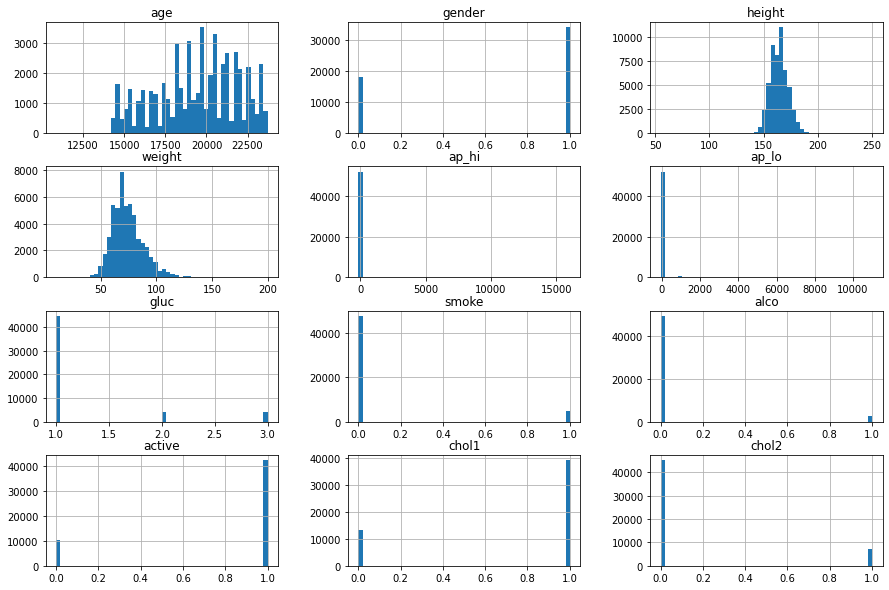

In [12]:
train_f.hist(bins=50, figsize=(15, 10))
plt.show()

## Getting Ready for Decision Trees

In [13]:
#For model evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#Actual Model
from sklearn.tree import DecisionTreeClassifier

In [14]:
#Training the model with the default parameters
tree_clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2)
tree_clf.fit(train_f,train_t)

#KFold cross-validation for evaluating the model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(tree_clf, train_f, train_t, scoring='accuracy', cv=cv, n_jobs=-1)

# Reporting the performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.733 (0.005)


In [15]:
#How well can the default predict?
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8805
           1       0.75      0.68      0.71      8695

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
pipeline = Pipeline([('clf',tree_clf)])
parameters = {
    'clf__max_depth': np.linspace(1,10,10),
    'clf__min_samples_split': (1,2,3,4,5),
    'clf__min_samples_leaf': (1,2,3,4,5)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(train_f,train_t)

grid_search.best_score_

0.7308571428571428

In [45]:
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f'{param_name} : {best_parameters[param_name]}')

clf__max_depth : 5.0
clf__min_samples_leaf : 1
clf__min_samples_split : 2


In [47]:
#KFold cross-validation for evaluating the model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(grid_search, train_f, train_t, scoring='accuracy', cv=cv, n_jobs=-1)

# Reporting the performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

KeyboardInterrupt: 

In [49]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_